In [1]:
# Importing necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
import matplotlib.patches as mpatches
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Activate latex text rendering
rc('text', usetex=True)
rc('axes', linewidth=2)
rc('font', weight='bold')
rcParams['text.latex.preamble'] = [r'\usepackage{amsmath} \boldmath']

In [14]:
# Importing the dataset
ames = pd.read_excel('C:\Users\DESKTOP-VENMHCC\Documents\ameshousing.xls')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-14-2b177e944c66>, line 2)

In [4]:
# Viewing the five datasets
ames.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
# Viewing the number of rows and columns of the dataset
ames.shape

(2930, 82)

In [6]:
# Viewing a summary of the whole dataset
ames.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [7]:
# Viewing the names of columns in the datasets
ames.keys()

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [8]:
# knowing the different data types the data is composed of
ames.get_dtype_counts()

float64    11
int64      28
object     43
dtype: int64

In [17]:
# A summary description of the target variables: Sale Price
ames['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [18]:
# A summary description of the explanatory variables : Overall Qual
ames['Overall Qual'].describe()

count    2930.000000
mean        6.094881
std         1.411026
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: Overall Qual, dtype: float64

In [19]:
# Summary description of the explanatory variables : Gr Liv Area
ames['Gr Liv Area'].describe()

count    2930.000000
mean     1499.690444
std       505.508887
min       334.000000
25%      1126.000000
50%      1442.000000
75%      1742.750000
max      5642.000000
Name: Gr Liv Area, dtype: float64

In [23]:
# A summary description of the explanatory variables : Total Bsmt SF
ames['Total Bsmt SF'].describe()

count    2929.000000
mean     1051.614544
std       440.615067
min         0.000000
25%       793.000000
50%       990.000000
75%      1302.000000
max      6110.000000
Name: Total Bsmt SF, dtype: float64

In [32]:
# Summary description of the explanatory variables : Lot Area
ames['Garage Area'].describe()

count    2929.000000
mean      472.819734
std       215.046549
min         0.000000
25%       320.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: Garage Area, dtype: float64

In [34]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

<center> <h1> Explanatory Data Analysis of the target variables with some explanatory variables </h1> </center>

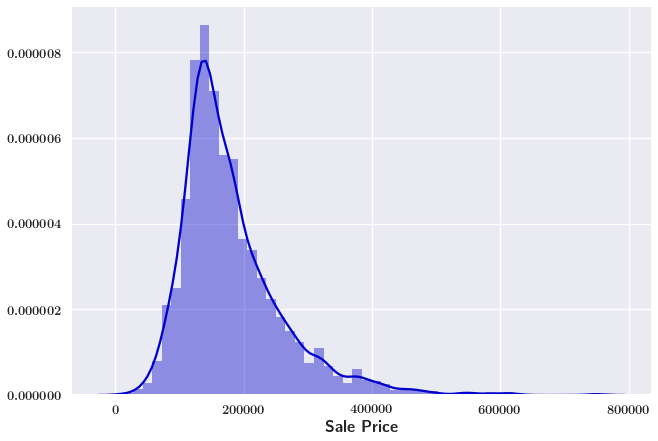

In [10]:
# Plotting the univariate variable SalePrice with seaborn modules
# This plots a histogram with kernet density estimation(KDE)
# KDE plots the probability density function of the SalePrice
sns.set_context("talk")
sns.distplot(ames['SalePrice'], color = 'mediumblue');
plt.xlabel(r'\textbf{Sale Price}', fontsize = 16)

In [11]:
#skewness and kurtosis
print("Skewness: %f" % ames['SalePrice'].skew())
print("Kurtosis: %f" % ames['SalePrice'].kurt())

Skewness: 1.743500
Kurtosis: 5.118900


*Scatter plot of Sale Price and Garage Area*

Scatter plot of GarageArea Vs. SalePrice


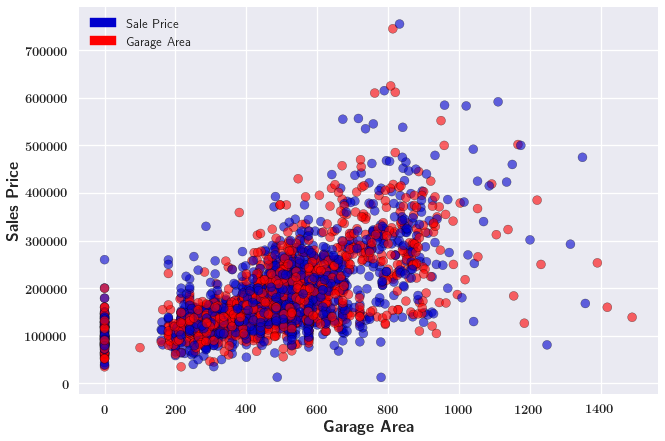

In [12]:
# Scatter of Garage Area and Sale Price
print('Scatter plot of GarageArea Vs. SalePrice')
plt.scatter('Garage Area', 'SalePrice', data = ames, alpha=0.6, color = ['red', 'mediumblue'], s = 80, edgecolors='black')
plt.xlabel(r'\textbf{Garage Area}', fontsize = 16)
plt.ylabel(r'\textbf{Sales Price}', fontsize = 16)
blue_patch = mpatches.Patch(color='mediumblue', label='Sale Price')
red_patch = mpatches.Patch(color='red', label='Garage Area')
plt.legend(loc=2, handles=[blue_patch, red_patch])

*Box plot of Sale Price and Overall Quality*

Box plot of Overall Qual Vs. SalePrice


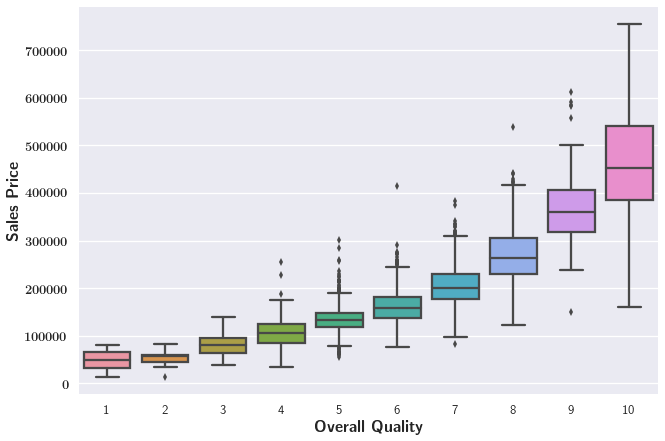

In [13]:
# Boxplot of Sale Price and Overall Quality
print('Box plot of Overall Qual Vs. SalePrice')
sns.boxplot('Overall Qual', 'SalePrice', data = ames)
plt.xlabel(r'\textbf{Overall Quality}', fontsize = 16)
plt.ylabel(r'\textbf{Sales Price}', fontsize = 16)

*Scatter plot of Sale Price and Ground Living Area*

Scatter plot of SalePrice Vs. Gr Living Area


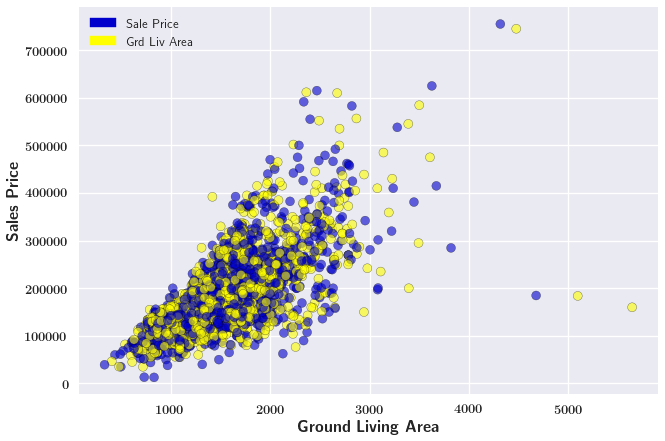

In [14]:
# Scatter plot of Sale Price and Ground Living Area
print('Scatter plot of SalePrice Vs. Gr Living Area')
plt.scatter('Gr Liv Area', 'SalePrice', data = ames, alpha=0.6, color = ['yellow', 'mediumblue'], s = 80, edgecolors='black')
plt.xlabel(r'\textbf{Ground Living Area}', fontsize = 16)
plt.ylabel(r'\textbf{Sales Price}', fontsize = 16)
blue_patch = mpatches.Patch(color='mediumblue', label='Sale Price')
red_patch = mpatches.Patch(color='yellow', label='Grd Liv Area')
plt.legend(loc=2, handles=[blue_patch, red_patch])

*Scatter plot of Sale Price and Total Basement Floor*

Scatter plot of SalePrice Vs. Total Bsmt SF


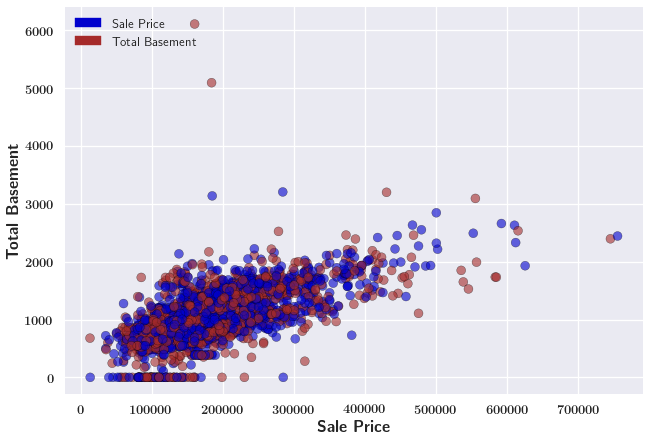

In [15]:
# Scatter plot of Sale Price and Total Bsmt SF
print('Scatter plot of SalePrice Vs. Total Bsmt SF')
plt.scatter('SalePrice', 'Total Bsmt SF', data = ames, alpha=0.6, color = ['mediumblue', 'brown'], s = 80, edgecolors='black')
plt.xlabel(r'\textbf{Sale Price}', fontsize = 16)
plt.ylabel(r'\textbf{Total Basement}', fontsize = 16)
blue_patch = mpatches.Patch(color='mediumblue', label='Sale Price')
red_patch = mpatches.Patch(color='brown', label='Total Basement')
plt.legend(loc=2, handles=[blue_patch, red_patch])

*Scatterplot of Lot Area*

Scatter plot of SalePrice Vs. Total Bsmt SF


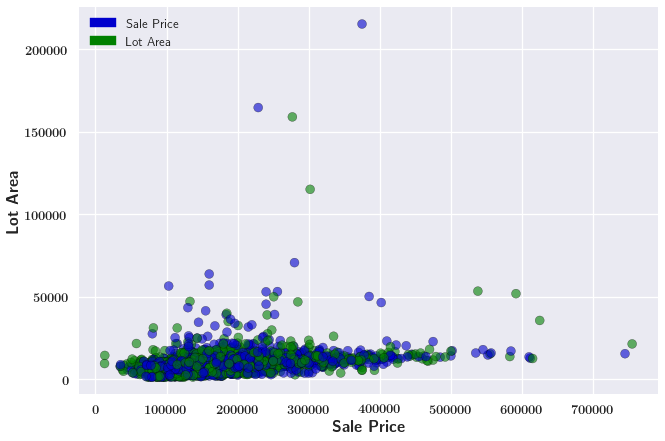

In [16]:
# Scatter plot of Sale Price and Total Bsmt SF
print('Scatter plot of SalePrice Vs. Total Bsmt SF')
plt.scatter('SalePrice', 'Lot Area', data = ames, alpha=0.6, color = ['mediumblue', 'green'], s = 80, edgecolors='black')
plt.xlabel(r'\textbf{Sale Price}', fontsize = 16)
plt.ylabel(r'\textbf{Lot Area}', fontsize = 16)
blue_patch = mpatches.Patch(color='mediumblue', label='Sale Price')
green_patch = mpatches.Patch(color='green', label='Lot Area')
plt.legend(loc=2, handles=[blue_patch, green_patch])

*Pairplot of Sale Price and Some highly correlated variables*

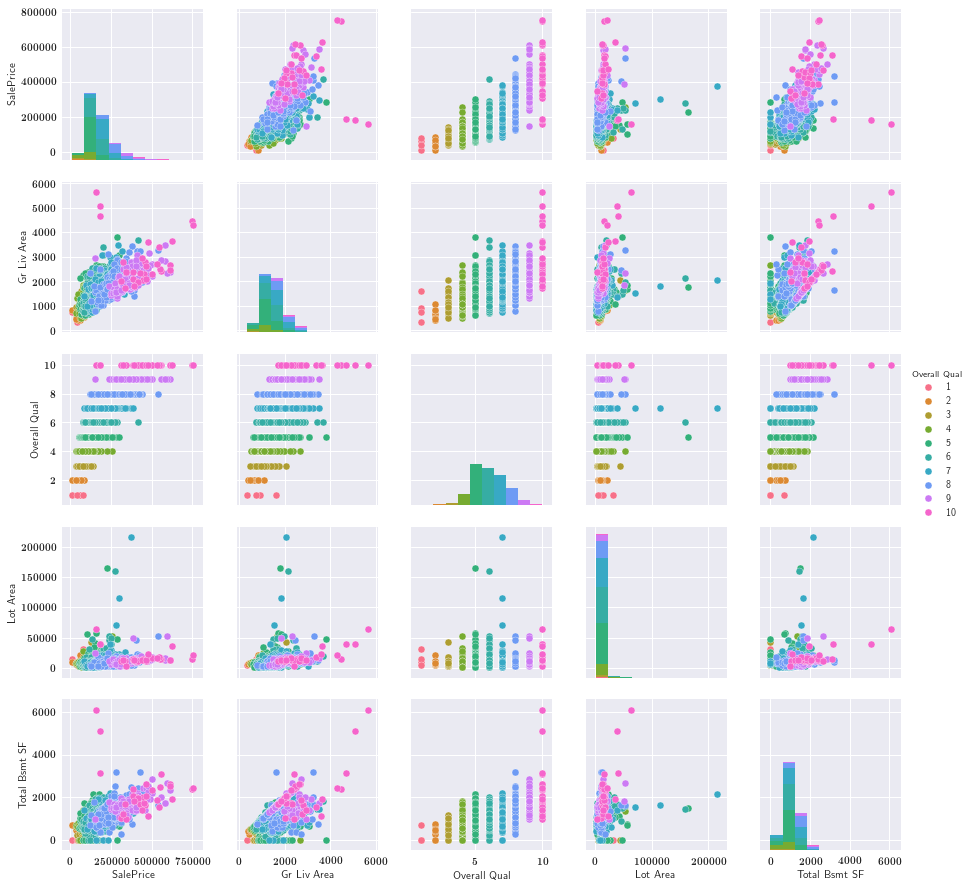

In [22]:
sns.set()
cols = ['SalePrice','Gr Liv Area', 'Overall Qual', 'Lot Area', 'Total Bsmt SF']
sns.pairplot(ames[cols], size = 2.5, hue='Overall Qual')
plt.savefig('pairplot.eps', format='eps', dpi=1000)

*Bar Chart of Total Sales Price by Building Type*

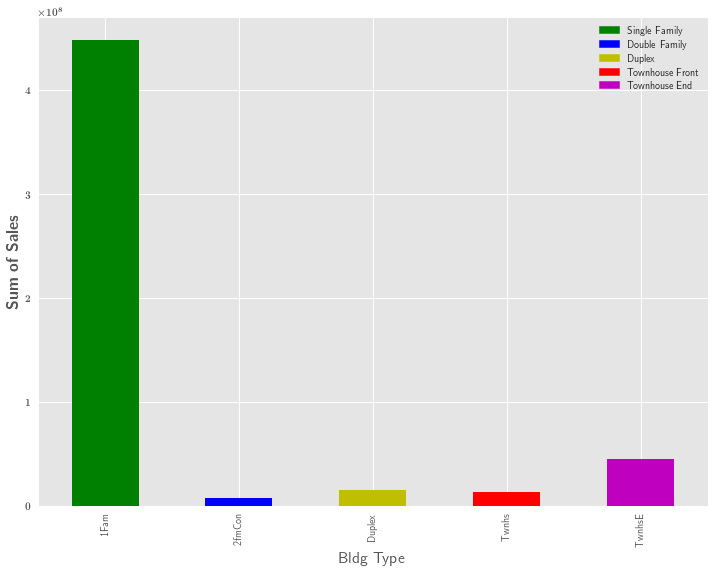

In [30]:
# Plot of Sales by House Type
plt.figure(figsize=(12,9))
style.use('ggplot')
var = ames.groupby('Bldg Type').SalePrice.sum()
plt.xlabel(r'\textbf{House Type}', fontsize = 16)  #X-axis label
plt.ylabel(r'\textbf{Sum of Sales}', fontsize = 16) #Y-axis label
# plt.title("House Type by Sales") #Chart title
var.plot(kind='bar', color='GBYRM')
green_patch = mpatches.Patch(color='G', label='Single Family')
blue_patch = mpatches.Patch(color='B', label='Double Family')
yellow_patch = mpatches.Patch(color='Y', label='Duplex')
red_patch = mpatches.Patch(color='R', label='Townhouse Front')
macron_patch = mpatches.Patch(color='M', label='Townhouse End')
plt.legend(handles = [green_patch, blue_patch,yellow_patch,red_patch,macron_patch])
plt.grid(True)
plt.savefig('housebytype.eps', format='eps', dpi=1000)

Bar Chart of Total Sales Price by Year of Sales

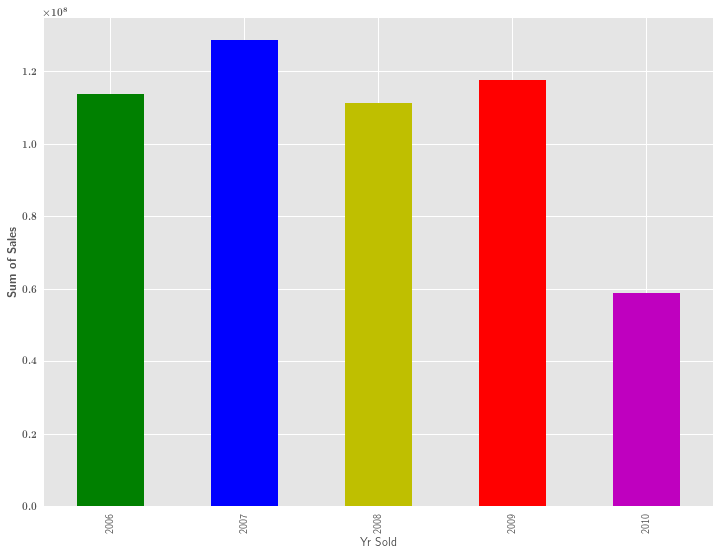

In [35]:
plt.figure(figsize=(12,9))
style.use('ggplot')
var1 = ames.groupby('Yr Sold').SalePrice.sum()
plt.xlabel(r'\textbf{Year Sold}')  #X-axis label
plt.ylabel(r'\textbf{Sum of Sales}') #Y-axis label
# plt.title("Year Sold by Sales") #Chart title
var1.plot(kind='bar', color='GBYRM')
plt.grid(True)
plt.savefig('housebyyear.eps', format='eps', dpi=1000)

<center> <h1> Data Mugging </h1> </center>

In this thesis, the data imputation follows the undr-listed steps:

* **Step1** Drop all missing values with more than 100 missing values


* **Step2** Perform mean imputation on the remaining continous variables


* **Step3** Perform mode imputation on the remaining categorical variables


* **Step4** Apply random forest to visualize features importances


* **Step5** Apply correlation matrix to visualize features importances


* **Step6** Split the dataset into train and test using a ratio of $\frac{2}{3}$ for the train and $\frac{1}{3}$ for the test

### Step 1

**Drop all missing values with more than 100 missing values**

In [36]:
# obtaining the number of missing values in the entire dataset
total = ames.isnull().sum().sort_values(ascending = False);
percent = (ames.isnull().sum()/ames.isnull().count()).sort_values(ascending = False);
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent']);
missing_data.head(28)

,Total,Percent
Pool QC,2917,0.995563
Misc Feature,2824,0.963823
Alley,2732,0.932423
Fence,2358,0.804778
Fireplace Qu,1422,0.485324
Lot Frontage,490,0.167235
Garage Qual,159,0.054266
Garage Yr Blt,159,0.054266
Garage Cond,159,0.054266
Garage Finish,159,0.054266


In [37]:
# Dropping columns with more than 100 missing values
ames = ames.drop((missing_data[missing_data['Total'] > 100]).index,1)
ames.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [38]:
# Saving new_ames dataset after delection
ames.to_csv('del_ames3.csv')

### Mean Imputation of ames dataset (float)

In [39]:
# subsetting float variables for mean imputation
f_ames = ames.loc[:,ames.dtypes == np.float64]

In [40]:
# Dimension of float dataset
f_ames.shape

(2930, 9)

In [41]:
# Sum of missing values in float dataset
f_ames.isnull().sum().sort_values(ascending=False)

Mas Vnr Area      23
Bsmt Half Bath     2
Bsmt Full Bath     2
Garage Area        1
Garage Cars        1
Total Bsmt SF      1
Bsmt Unf SF        1
BsmtFin SF 2       1
BsmtFin SF 1       1
dtype: int64

In [42]:
f_ames.head(5)

,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Cars,Garage Area
0,112.0,639.0,0.0,441.0,1080.0,1.0,0.0,2.0,528.0
1,0.0,468.0,144.0,270.0,882.0,0.0,0.0,1.0,730.0
2,108.0,923.0,0.0,406.0,1329.0,0.0,0.0,1.0,312.0
3,0.0,1065.0,0.0,1045.0,2110.0,1.0,0.0,2.0,522.0
4,0.0,791.0,0.0,137.0,928.0,0.0,0.0,2.0,482.0


In [43]:
# Mean imputation of float64 data types
mean_imp = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
f2_ames = mean_imp.fit_transform(f_ames)

In [44]:
# Converting the imputed dataset into dataframe
f2_ames = pd.DataFrame(f2_ames)
# Replacing the imputed dataset columns names with its initial name
f2_ames.columns = f_ames.columns
f2_ames.keys()

Index(['Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars',
       'Garage Area'],
      dtype='object')

In [45]:
# Replacing missing values with imputed values in the original dataset
cols = ['Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars',
       'Garage Area']
ames[cols] = f2_ames[cols]

### Mean Imputation of ames dataset(integer)

In [46]:
# subsetting float variables for mean imputation
i_ames = ames.loc[:,ames.dtypes == np.int64]

In [47]:
# Dimension of integers
i_ames.shape

(2930, 28)

In [48]:
# Sum of missing values of integer dataset
i_ames.isnull().sum().sort_values(ascending=False)

SalePrice          0
Yr Sold            0
PID                0
MS SubClass        0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Order              0
dtype: int64

### Mode imputation for discrete variables

In [49]:
# subsetting object variables for mean imputation
object_ames = ames.loc[:,ames.dtypes == np.object]

In [50]:
# Dimension of objects
object_ames.shape

(2930, 34)

In [51]:
# Sum of missing values of objects dataset
object_ames.isnull().sum().sort_values(ascending=False)

Bsmt Exposure     83
BsmtFin Type 2    81
BsmtFin Type 1    80
Bsmt Qual         80
Bsmt Cond         80
Mas Vnr Type      23
Electrical         1
Utilities          0
Lot Config         0
Land Slope         0
Roof Matl          0
Land Contour       0
Lot Shape          0
Street             0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Roof Style         0
Sale Condition     0
Exterior 1st       0
Exterior 2nd       0
Sale Type          0
Exter Qual         0
Exter Cond         0
Foundation         0
Heating            0
Heating QC         0
Central Air        0
Kitchen Qual       0
Functional         0
Paved Drive        0
MS Zoning          0
dtype: int64

In [52]:
# Looking at categorical values
def obj_explore(column):
    return ames[column].value_counts()

In [53]:
# Imputing the missing values
def obj_impute(column, value):
    ames.loc[ames[column].isnull(),column] = value

### Bsmt Exposure

# Viewing the modal class
obj_explore('Bsmt Exposure')

In [54]:
# Imputing with the mode
obj_impute('Bsmt Exposure', 'No')

### BsmtFin Type 2

In [55]:
# Viewing the modal class
obj_explore('BsmtFin Type 2')

Unf    2499
Rec     106
LwQ      89
BLQ      68
ALQ      53
GLQ      34
Name: BsmtFin Type 2, dtype: int64

In [56]:
# Imputing with the mode
obj_impute('BsmtFin Type 2', 'Unf')

### BsmtFin Type 1

In [57]:
# Viewing the modal class
obj_explore('BsmtFin Type 1')

GLQ    859
Unf    851
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFin Type 1, dtype: int64

In [58]:
# Imputing with the mode
obj_impute('BsmtFin Type 1', 'GLQ')

### Bsmt Qual

In [59]:
# viewing the modal class
obj_explore('Bsmt Qual')

TA    1283
Gd    1219
Ex     258
Fa      88
Po       2
Name: Bsmt Qual, dtype: int64

In [60]:
# Imputing with the mode
obj_impute('Bsmt Qual', 'TA')

### Bsmt Cond

In [61]:
# viewing the modal class
obj_explore('Bsmt Cond')

TA    2616
Gd     122
Fa     104
Po       5
Ex       3
Name: Bsmt Cond, dtype: int64

In [62]:
# imputing with the mode
obj_impute('Bsmt Cond', 'TA')

### Mas Vnr Type

In [63]:
# Viewing the modal class
obj_explore('Mas Vnr Type')

None       1752
BrkFace     880
Stone       249
BrkCmn       25
CBlock        1
Name: Mas Vnr Type, dtype: int64

In [64]:
# Imputing with the modal class
obj_impute('Mas Vnr Type', 'None')

### Electricals

In [65]:
# Viewing the modal class
obj_explore('Electrical')

SBrkr    2682
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [66]:
# Imputing with the mode
obj_impute('Electrical', 'SBrkr')

### Cross Checking for missing values

In [67]:
ames.isnull().sum().sort_values(ascending=False)

SalePrice          0
Mas Vnr Area       0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Exter Qual         0
Overall Cond       0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
Year Built         0
Overall Qual       0
BsmtFin Type 2     0
Land Contour       0
PID                0
MS SubClass        0
MS Zoning          0
Lot Area           0
Street             0
Lot Shape          0
Utilities          0
House Style        0
Lot Config         0
Land Slope         0
                  ..
Paved Drive        0
Wood Deck SF       0
Open Porch SF      0
3Ssn Porch         0
TotRms AbvGrd      0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Yr Sold            0
Sale Type          0
Functional         0
Kitchen Qual       0
Bsmt Unf SF        0
2nd Flr SF         0
Total Bsmt SF      0
Heating      

In [68]:
# Saving file after imputation
ames.to_csv('impute_ames2.csv')

<center> <h1> Feature Importances </h1> </center>

In thsi section we are going to use two approach to select features according to their contributions to the Sale Prices

* In the first case, we are going to use the correlation matrix

* In the second case, we are going to use the random forest features importances

### Correlation Matrix

In [69]:
# Delecting Order column
del ames['Order']
# Delecting PID column
del ames['PID']

In [70]:
# Saving the dataset after removal
ames.to_csv('imputed2remove_ames.csv')

In [71]:
# Correlation matrix of ames dataset
ames.corr()

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
MS SubClass,1.000000,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002724,-0.060067,-0.070937,-0.130404,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Area,-0.204613,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126586,0.191546,0.083145,0.023657,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,0.039419,0.097188,1.000000,-0.094812,0.597027,0.569609,0.427470,0.284011,-0.041272,0.269956,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,-0.067349,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135088,-0.050920,0.041122,-0.136780,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,0.036579,0.023258,0.597027,-0.368773,1.000000,0.612095,0.311828,0.279836,-0.027412,0.128983,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,0.043397,0.021682,0.569609,0.047680,0.612095,1.000000,0.196170,0.151720,-0.062100,0.164729,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,0.002724,0.126586,0.427470,-0.135088,0.311828,0.196170,1.000000,0.300396,-0.016007,0.091210,...,0.165108,0.142766,-0.110447,0.013778,0.065622,0.004617,0.044932,-0.000275,-0.017665,0.505784
BsmtFin SF 1,-0.060067,0.191546,0.284011,-0.050920,0.279836,0.151720,0.300396,1.000000,-0.054129,-0.477875,...,0.223989,0.124937,-0.100453,0.050541,0.095873,0.084140,0.092886,-0.001155,0.022397,0.432794
BsmtFin SF 2,-0.070937,0.083145,-0.041272,0.041122,-0.027412,-0.062100,-0.016007,-0.054129,1.000000,-0.238617,...,0.098518,-0.005587,0.032379,-0.023325,0.062950,0.044398,-0.005204,-0.009483,0.007105,0.005890
Bsmt Unf SF,-0.130404,0.023657,0.269956,-0.136780,0.128983,0.164729,0.091210,-0.477875,-0.238617,1.000000,...,-0.039618,0.118870,0.006229,-0.005446,-0.048082,-0.031999,-0.010166,0.021566,-0.036384,0.182805


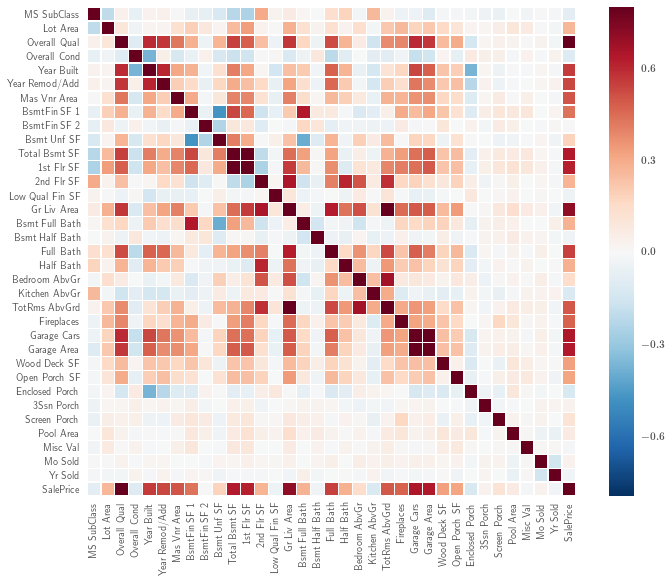

In [73]:
# Heat map of the correlation matrix using correlation coefficient values
cormat = ames.corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(cormat, vmax=.8, square=True, linewidths=.5)
plt.savefig('correlation.eps', format='eps', dpi=1000)

### Random Forest feature selection

In the first instance, we need to change all categorical dataset into integers

And then apply randomforest for feature importances

### Step1

Encoding categorical variables into integers

In [74]:
# Subsetting the dataset into objects
obj = ames.loc[:,ames.dtypes == np.object]

In [75]:
# Viewing the objects data set
obj.head(5)

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Paved Drive,Sale Type,Sale Condition
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Unf,GasA,Fa,Y,SBrkr,TA,Typ,P,WD,Normal
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Y,WD,Normal
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Y,WD,Normal


In [76]:
# Viewing the columns names
obj.keys()

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Paved Drive', 'Sale Type', 'Sale Condition'],
      dtype='object')

In [77]:
# Encoding the categorical variables into labels
var_mod = ['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Paved Drive', 'Sale Type', 'Sale Condition']
le = LabelEncoder()
for i in var_mod:
    ames[i] = le.fit_transform(ames[i])
ames.dtypes

MS SubClass          int64
MS Zoning            int64
Lot Area             int64
Street               int64
Lot Shape            int64
Land Contour         int64
Utilities            int64
Lot Config           int64
Land Slope           int64
Neighborhood         int64
Condition 1          int64
Condition 2          int64
Bldg Type            int64
House Style          int64
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style           int64
Roof Matl            int64
Exterior 1st         int64
Exterior 2nd         int64
Mas Vnr Type         int64
Mas Vnr Area       float64
Exter Qual           int64
Exter Cond           int64
Foundation           int64
Bsmt Qual            int64
Bsmt Cond            int64
Bsmt Exposure        int64
                    ...   
Electrical           int64
1st Flr SF           int64
2nd Flr SF           int64
Low Qual Fin SF      int64
Gr Liv Area          int64
Bsmt Full Bath     float64
B

In [78]:
# Saving the encoded ames dataset
ames.to_csv('encode_ames2.csv')

In [79]:
# Viewing the different data types
ames.get_dtype_counts()

float64     9
int64      60
dtype: int64

### Fitting a randomforest for features importances

First we need to split the dataset into X and Y

And then perform a randomforest training

Then we visualize the feature importances of each variables

**First we need to split the dataset into X and Y**

In [80]:
# Splitting the dataset into X and Y
# X contains all the predictor variables values
X = ames.drop('SalePrice', axis = 1)
# Y contains the target variables values
Y = ames.SalePrice

In [81]:
X.head(5)

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,20,5,31770,1,0,3,0,0,0,15,...,62,0,0,0,0,0,5,2010,9,4
1,20,4,11622,1,3,3,0,4,0,15,...,0,0,0,120,0,0,6,2010,9,4
2,20,5,14267,1,0,3,0,0,0,15,...,36,0,0,0,0,12500,6,2010,9,4
3,20,5,11160,1,3,3,0,0,0,15,...,0,0,0,0,0,0,4,2010,9,4
4,60,5,13830,1,0,3,0,4,0,8,...,34,0,0,0,0,0,3,2010,9,4


In [82]:
Y.head(5)

0    215000
1    105000
2    172000
3    244000
4    189900
Name: SalePrice, dtype: int64

**And then perform a randomforest training**

In [83]:
# Calling a randomforest module
rf = RandomForestRegressor()
rf.fit(X,Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [84]:
# Viewing estimated coefficients
print('Estimated coefficients'), rf.feature_importances_

Estimated coefficients


(None, array([  1.28160097e-03,   3.32180400e-03,   1.85876234e-02,
          1.18780535e-06,   7.63775358e-04,   1.96242252e-03,
          2.26333648e-08,   1.08517503e-03,   1.42039708e-03,
          2.78041087e-03,   5.72872294e-04,   3.05759766e-04,
          2.04905393e-04,   8.80658810e-04,   6.54864157e-01,
          3.64320306e-03,   9.71326666e-03,   7.23984484e-03,
          1.39434271e-03,   2.38588967e-04,   1.24949448e-03,
          1.03334767e-03,   5.62596919e-04,   3.00961337e-03,
          7.42785434e-04,   2.53150228e-04,   7.14376149e-04,
          1.89121018e-03,   3.00180519e-04,   1.43865558e-03,
          1.41080357e-03,   2.08714748e-02,   2.10170401e-04,
          4.06951626e-04,   5.25496378e-03,   4.20558318e-02,
          3.77989491e-05,   6.70115331e-04,   1.24801114e-03,
          1.44955075e-04,   1.81778370e-02,   1.48853932e-02,
          8.80897989e-05,   1.09246287e-01,   1.44328796e-03,
          8.51333233e-04,   1.73678354e-03,   5.84889671e-04,
  

In [85]:
# Tabular view of features importances
importance = pd.DataFrame(list(zip(X, rf.feature_importances_))).sort_values(ascending = False, by = [1])
importance.columns = ['features','value_contribution']
# View of the first twenty important features
importance.head(20)

,features,value_contribution
14,Overall Qual,0.654864
43,Gr Liv Area,0.109246
35,Total Bsmt SF,0.042056
31,BsmtFin SF 1,0.020871
2,Lot Area,0.018588
40,1st Flr SF,0.018178
54,Garage Cars,0.017689
41,2nd Flr SF,0.014885
55,Garage Area,0.011170
16,Year Built,0.009713


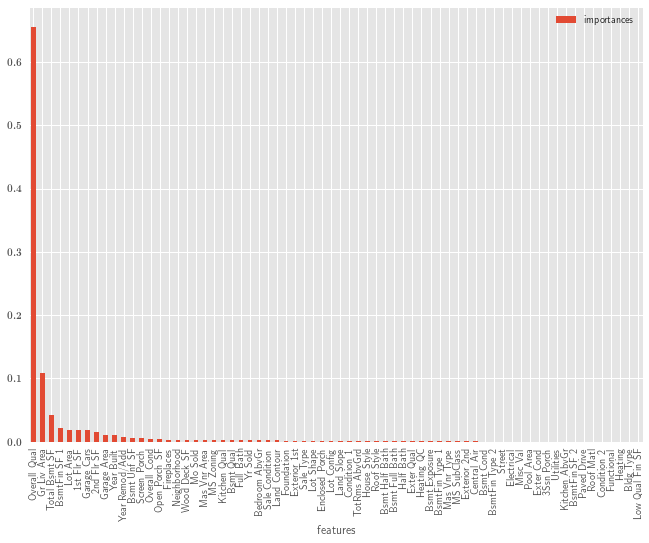

In [86]:
# Plot of the features importances
features_importance = pd.DataFrame({'features': X.columns, 'importances':np.round(rf.feature_importances_,3)})
features_importance = features_importance.sort_values('importances',ascending=False).set_index('features')
features_importance.plot.bar( figsize = (11,8))
plt.savefig('rf_features.eps', format='eps', dpi=1000)

<center> <h1> Regression Lines of Some important features with respect to Sale Price </h1> </center>

** Regression line of Overall Qual**

In [87]:
X1 = np.arange(1,11)
sub_df = ames[['Overall Qual','SalePrice']]
ay = sub_df.groupby('Overall Qual').SalePrice.median().values
y_std = sub_df.groupby('Overall Qual').SalePrice.std().values

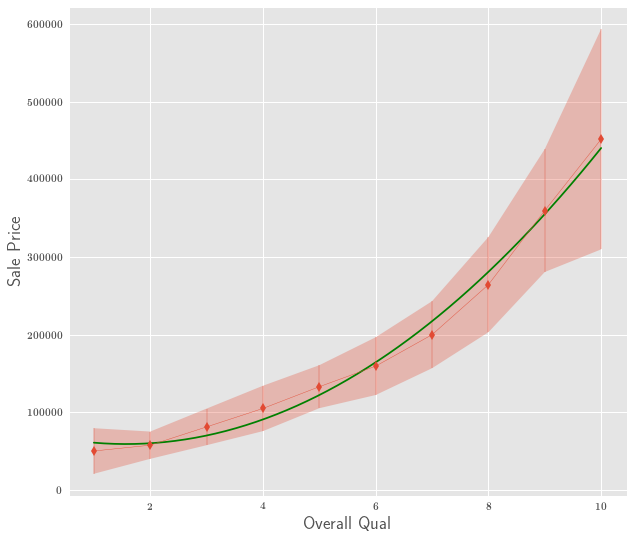

In [89]:
coeff = np.polyfit(X1, ay, deg=2)
plt.figure(figsize = (10,9))

plt.errorbar(X1, ay, yerr=y_std, marker='d', lw=0.4)
plt.fill_between(x=X1, y1=ay+y_std, y2=ay-y_std, alpha=0.3)

Xp = np.linspace(1,10,51)
plt.plot(Xp, coeff[0]*Xp**2 + coeff[1]*Xp + coeff[2], 'g')

plt.xlabel('Overall Qual', fontsize=18)
plt.ylabel('Sale Price', fontsize=18)
plt.savefig('overallreg.eps', format='eps', dpi=1000)

**Regression Line of Ground Living Area**

In [90]:
# Regression line of Ground Living Area
plt.figure(figsize=(10,9))
fit = np.polyfit(X_test['Gr Liv Area'],Y_test,1)
gr_fit = np.poly1d(fit)
plt.xlabel(r'\textbf{Ground Living Area}', fontsize = 16)
plt.ylabel(r'\textbf{Sale Price}', fontsize = 16)
plt.plot(X_test['Gr Liv Area'], Y_test, 'bo', X_test['Gr Liv Area'], gr_fit(X_test['Gr Liv Area']), '--k')
plt.savefig('grlivreg.eps', format='eps', dpi=1000)

NameError: name 'X_test' is not defined

**Regression Line of Total Basement**

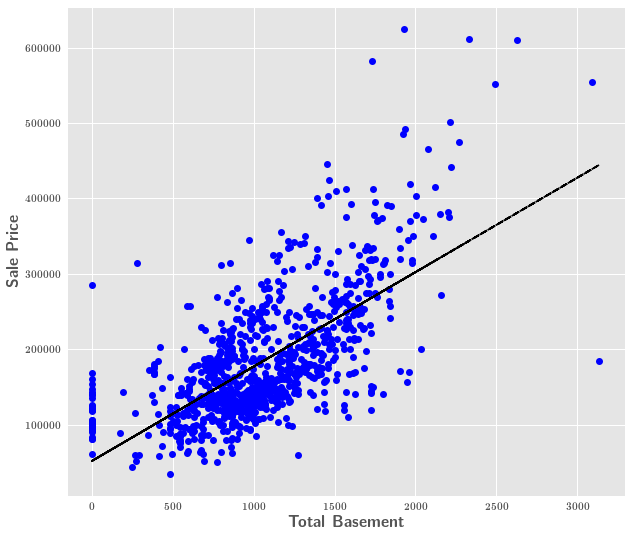

In [143]:
# Regression line of Total Basement
plt.figure(figsize=(10,9))
fit = np.polyfit(X_test['Total Bsmt SF'],Y_test,1)
gr_fit = np.poly1d(fit)
plt.xlabel(r'\textbf{Total Basement}', fontsize = 16)
plt.ylabel(r'\textbf{Sale Price}', fontsize = 16)
plt.plot(X_test['Total Bsmt SF'], Y_test, 'bo', X_test['Total Bsmt SF'], gr_fit(X_test['Total Bsmt SF']), '--k')

**Regression Line of Lot Area**

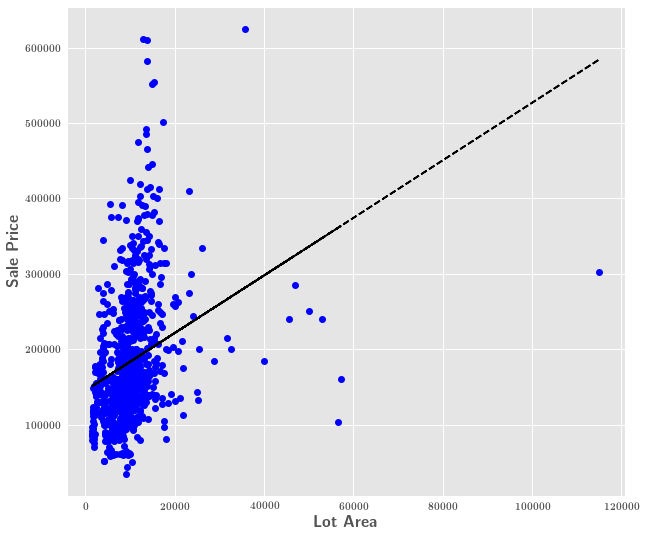

In [145]:
# Regression line of Total Basement
plt.figure(figsize=(10,9))
fit = np.polyfit(X_test['Lot Area'],Y_test,1)
gr_fit = np.poly1d(fit)
plt.xlabel(r'\textbf{Lot Area}', fontsize = 16)
plt.ylabel(r'\textbf{Sale Price}', fontsize = 16)
plt.plot(X_test['Lot Area'], Y_test, 'bo', X_test['Lot Area'], gr_fit(X_test['Lot Area']), '--k')

**Regression line of Garage Cars**

In [151]:
X2 = np.arange(1,8)
sub_df = ames[['Garage Cars','SalePrice']]
by = sub_df.groupby('Garage Cars').SalePrice.median().values
by_std = sub_df.groupby('Garage Cars').SalePrice.std().values

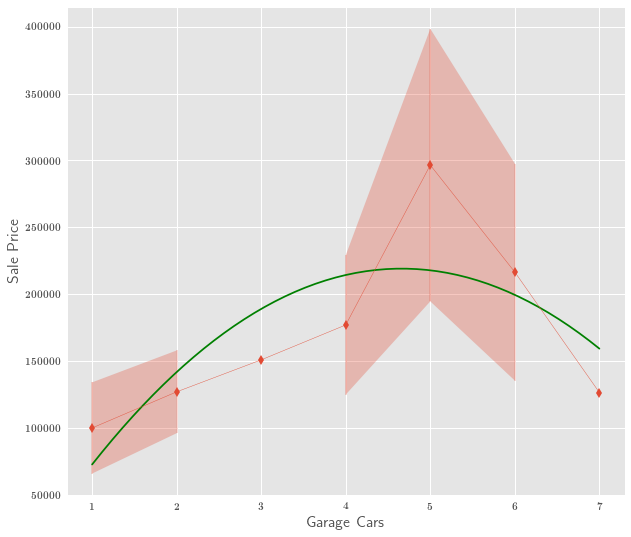

In [152]:
coeff = np.polyfit(X2, by, deg=2)
plt.figure(figsize = (10,9))

plt.errorbar(X2, by, yerr=y_std, marker='d', lw=0.4)
plt.fill_between(x=X2, y1=by+by_std, y2=by-by_std, alpha=0.3)

Xp = np.linspace(1,7,51)
plt.plot(Xp, coeff[0]*Xp**2 + coeff[1]*Xp + coeff[2], 'g')

plt.xlabel('Garage Cars', fontsize=16)
plt.ylabel('Sale Price', fontsize=16)

<center> <h1> Predictive Analysis </h1> </center>

In the first place, we divide the dataset into x_train, X_test, Y_train, Y_test in the ratio $\frac{1}{3}$ for the testing and $\frac{2}{3}$ for the train set

And then we fit the following regressions: multi-linear, knn, randomforest and naivebayes.

Predicts their sales prices 

Calculate their accuracy using MSE

### Dividing the train and test set into their ratio

In [91]:
# Dividing the train and test data in the ration 1/3 for the test data
# And 2/3 for the train data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [92]:
#Saving the X_train
X_train.to_csv('X_train_ames.csv')

In [93]:
# Saving the Y_train
Y_train.to_csv('Y_train_ames.csv')

In [94]:
# Saving X_test
X_test.to_csv('X_test_ames.csv')

In [95]:
# Saving Y_test
Y_test.to_csv('Y_test_ames.csv')

In [96]:
# Viewing X_train shape
X_train.shape

(1963, 68)

In [97]:
# Viewing X_test shape
X_test.shape

(967, 68)

In [98]:
# Viewing Y_train shape
Y_train.shape

(1963,)

In [99]:
# Viewing Y_test shape
Y_test.shape

(967,)

<center> <h1> Multilinear regression </h1> </center>

We are going to fit a multilinear regression on the train

Make predictions on the test data

Check predictions accuracy using MSE

**Step1: Training the algorithm**

In [100]:
# Fit a linear regression on the train set
lm = LinearRegression()
lm.fit(X_train, Y_train)
print(lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [101]:
# Print the estimated coefficients
print('The estimated coefficients are:'), lm.coef_

The estimated coefficients are:


(None, array([ -1.16227094e+02,  -7.82097638e+02,   4.04032661e-01,
          2.36370107e+04,  -1.29766217e+03,   2.29354584e+03,
         -1.46458006e+03,   1.60445923e+02,   6.80142028e+03,
          2.43493502e+02,   6.10320693e+02,   6.04550968e+03,
         -1.84099780e+03,  -1.32900815e+03,   1.23778474e+04,
          4.23123977e+03,   2.05810879e+02,   3.09998323e+01,
          2.86931287e+03,   2.97333331e+03,  -1.00093307e+03,
          4.45355348e+02,   3.52209710e+03,   3.34103063e+01,
         -1.04525909e+04,   9.23889328e+02,   4.18024605e+02,
         -4.20516336e+03,   1.97396066e+03,  -4.56616383e+03,
         -1.33077314e+03,   5.76009784e+00,   1.81036130e+02,
          3.88020943e+00,  -2.42862173e+00,   7.21168556e+00,
         -5.23544144e+03,  -9.41888072e+02,   1.12007156e+03,
          3.54853588e+01,   1.60295742e+01,   2.03853615e+01,
         -2.47115700e+00,   3.39437787e+01,   7.63164115e+03,
         -1.03758126e+03,   2.45762199e+03,  -5.43689933e+02,
  

In [102]:
# Print the estimated intercept
print('The estimated intercepts is:'), lm.intercept_

The estimated intercepts is:


(None, 2764847.4918999132)

In [104]:
# Tabular view of predicted prices vs actual prices
lmt2 = pd.DataFrame(list(zip(X_train.columns, lm.coef_))).sort_values(ascending = False, by = [1]);
lmt2.columns = ['variables', 'coefficients values'];
lmt2.head(10)

,variables,coefficients values
3,Street,23637.010695
14,Overall Qual,12377.847391
54,Garage Cars,8252.083473
44,Bsmt Full Bath,7631.641154
8,Land Slope,6801.420279
11,Condition 2,6045.509676
53,Fireplaces,4575.904858
15,Overall Cond,4231.239770
22,Mas Vnr Type,3522.097101
67,Sale Condition,3340.785552


** Step2: Making predictions on the test data**

In [105]:
# Predicting the Sale Price on the X_test data
lm_predict = lm.predict(X_test)

In [106]:
# Tabular view of predicted prices vs actual prices
lmt = pd.DataFrame(list(zip(Y_test, lm_predict)));
lmt.columns = ['actual value', 'predicted value'];
lmt.head(10)

,actual value,predicted value
0,161000,183680.179913
1,116000,111362.657800
2,196500,221041.903909
3,123600,109372.822770
4,126000,118307.271169
5,174190,204303.315691
6,200000,171057.686011
7,148500,143894.220598
8,88750,113347.395574
9,409900,329064.856845


** Step3: Checking Prediction Accuracy**

In [107]:
# Printing prediction accuracy using MSE
lm_mse = np.mean((lm_predict - Y_test) ** 2).sum()
print('The mean square error of the test data is given by:'), lm_mse

The mean square error of the test data is given by:


(None, 896581614.47343171)

In [118]:
# Printing R square
lm.score(X_test,Y_test)

0.867394751651547

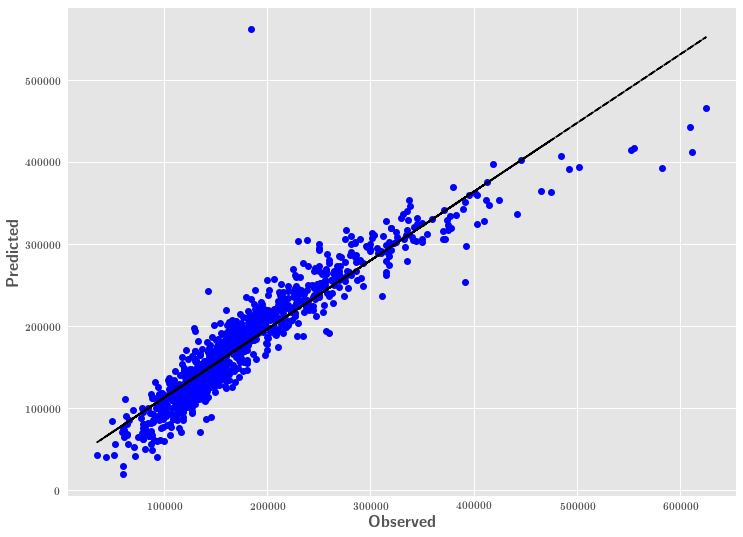

In [120]:
# Regression line of Observed vs Predicted
plt.figure(figsize=(12,9))
fit = np.polyfit(Y_test,lm_predict,1)
gr_fit = np.poly1d(fit)
plt.xlabel(r'\textbf{Observed}', fontsize = 16)
plt.ylabel(r'\textbf{Predicted}', fontsize = 16)
plt.plot(Y_test, lm_predict, 'bo', Y_test, gr_fit(Y_test), '--k')
plt.savefig('LMPREDICT.eps', format='eps', dpi=1000)

<center> <h1> k-NN regression </h1> </center>

We are going to fit a k-NN regression on the train

Make predictions on the test data

Check predictions accuracy using MSE

**Step1: Training the algorithm**

In [110]:
# Fit a k-NN regression on the train set
knn = KNeighborsRegressor()
knn.fit(X_train, Y_train)
print(knn)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')


**Step2: Making predictions on the test data**

In [111]:
# Predicting the Sale Price on the X_test data
knn_predict = knn.predict(X_test)

In [112]:
# Tabular view of predicted prices vs actual prices
knnt = pd.DataFrame(list(zip(Y_test, knn_predict)));
knnt.columns = ['actual value', 'predicted value'];
knnt.head(10)

,actual value,predicted value
0,161000,130600.0
1,116000,92680.0
2,196500,184380.0
3,123600,122800.0
4,126000,110400.0
5,174190,171628.2
6,200000,163540.0
7,148500,146440.0
8,88750,95240.0
9,409900,210300.0


**Step3: Checking Prediction Accuracy**

In [113]:
# Printing prediction accuracy using MSE
knn_mse = np.mean((knn_predict - Y_test) ** 2).sum()
print('The mean square error of the test data is given by:'), knn_mse

The mean square error of the test data is given by:


(None, 1952345123.1629367)

In [116]:
# Printing R square
knn.score(X_test, Y_test)

0.7112463542195645

In [121]:
# Printing R square
rf.score(X_test,Y_test)

0.98291628450211266

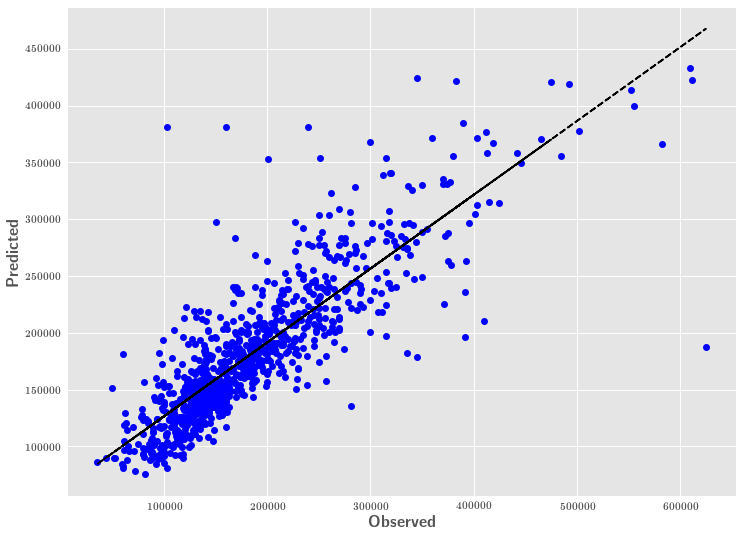

In [122]:
# Regression line of Observed vs Predicted
plt.figure(figsize=(12,9))
fit = np.polyfit(Y_test,knn_predict,1)
gr_fit = np.poly1d(fit)
plt.xlabel(r'\textbf{Observed}', fontsize = 16)
plt.ylabel(r'\textbf{Predicted}', fontsize = 16)
plt.plot(Y_test, knn_predict, 'bo', Y_test, gr_fit(Y_test), '--k')
plt.savefig('KNNPREDICT.eps', format='eps', dpi=1000)

<center> <h1> Random Forest Regression </h1> </center>

We are going to fit a random forest regression on the train

Make predictions on the test data

Check predictions accuracy using MSE

**Step1: Training the algorithm**

In [142]:
# Fit a random forest regression on the train set
rf1 =RandomForestRegressor()
rf1.fit(X_train, Y_train)
print(rf1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [143]:
# Print the estimated coefficients
print('The estimated coefficients are:'), rf1.feature_importances_

The estimated coefficients are:


(None, array([  1.60036822e-03,   4.77718626e-03,   2.10534101e-02,
          4.31322263e-05,   5.33113684e-04,   6.78632195e-04,
          5.29283343e-06,   1.22331654e-03,   5.82984032e-04,
          1.02363813e-02,   5.21081825e-04,   2.75728625e-05,
          2.30183913e-04,   3.81432134e-04,   5.70403820e-01,
          2.64439297e-03,   1.03618437e-02,   6.15878880e-03,
          1.37148464e-03,   9.37591630e-04,   1.76424359e-03,
          1.05567047e-03,   1.07104454e-03,   3.50656965e-03,
          1.06865644e-03,   6.33235419e-04,   7.75761044e-04,
          2.01697077e-02,   2.18160972e-04,   1.43927413e-03,
          1.69906906e-03,   2.02243112e-02,   4.18513933e-04,
          3.82949120e-04,   4.28826276e-03,   2.95135912e-02,
          9.10244896e-05,   9.94507559e-04,   2.34097163e-03,
          8.79673302e-05,   2.86746813e-02,   2.74512027e-02,
          2.20483051e-04,   9.88776080e-02,   1.92598380e-03,
          1.74157076e-05,   3.61115667e-02,   6.12969342e-04,
  

**Step2: Making predictions on the test data**

In [144]:
# Predicting the Sale Price on the X_test data
rf1_predict = rf1.predict(X_test)

In [145]:
# Tabular view of predicted prices vs actual prices
rf1t = pd.DataFrame(list(zip(Y_test, rf1_predict)));
rf1t.columns = ['actual value', 'predicted value'];
rf1t.head(10)

,actual value,predicted value
0,161000,173490.0
1,116000,100850.0
2,196500,195980.0
3,123600,119800.0
4,126000,103080.0
5,174190,172927.7
6,200000,178175.0
7,148500,151610.0
8,88750,84280.0
9,409900,381072.3


**Step3: Checking Prediction Accuracy**

In [146]:
# Printing prediction accuracy using MSE
rf1_mse = np.mean((rf1_predict - Y_test) ** 2).sum()
print('The mean square error of the test data is given by:'), rf1_mse

The mean square error of the test data is given by:


(None, 647384898.10887289)

In [147]:
#
rf1.score(X_test,Y_test)

0.9042511760168277

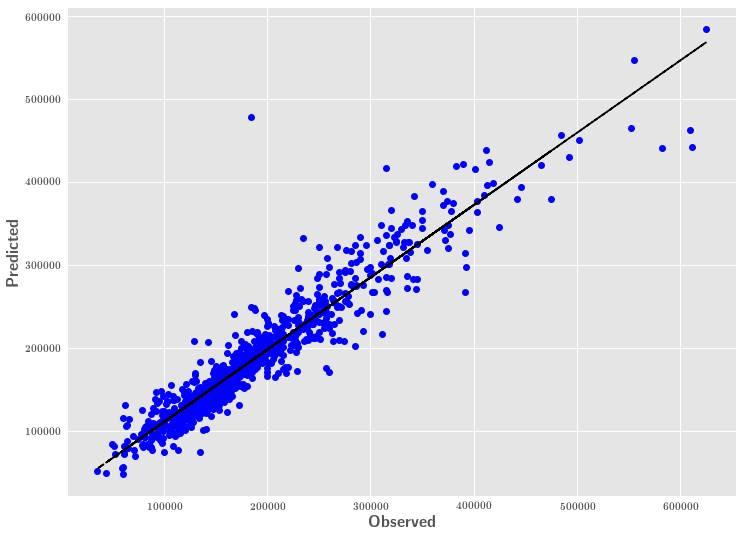

In [129]:
# Regression line of Observed vs Predicted
plt.figure(figsize=(12,9))
fit = np.polyfit(Y_test,rf1_predict,1)
gr_fit = np.poly1d(fit)
plt.xlabel(r'\textbf{Observed}', fontsize = 16)
plt.ylabel(r'\textbf{Predicted}', fontsize = 16)
plt.plot(Y_test, rf1_predict, 'bo', Y_test, gr_fit(Y_test), '--k')
plt.savefig('RFPREDICT.eps', format='eps', dpi=1000)

<center> <h1> Gaussian Naives Bayesian Regression </h1> </center> 

We are going to fit a naive bayesian regression on the train

Make predictions on the test data

Check predictions accuracy using MSE

**Step1: Training the algorithm**

In [116]:
# Fit a naive regression on the train set
nb = GaussianNB()
nb.fit(X_train, Y_train)
print(nb)

GaussianNB(priors=None)


In [118]:
# Print the estimated coefficients
print('The estimated coefficients are:'), nb.theta_

The estimated coefficients are:


(None, array([[  3.00000000e+01,   6.00000000e+00,   9.65600000e+03, ...,
           2.01000000e+03,   9.00000000e+00,   0.00000000e+00],
        [  2.00000000e+01,   0.00000000e+00,   1.45840000e+04, ...,
           2.00800000e+03,   9.00000000e+00,   0.00000000e+00],
        [  3.00000000e+01,   1.00000000e+00,   7.87900000e+03, ...,
           2.00900000e+03,   9.00000000e+00,   0.00000000e+00],
        ..., 
        [  2.00000000e+01,   5.00000000e+00,   1.27200000e+04, ...,
           2.00800000e+03,   9.00000000e+00,   4.00000000e+00],
        [  6.00000000e+01,   5.00000000e+00,   1.56230000e+04, ...,
           2.00700000e+03,   9.00000000e+00,   0.00000000e+00],
        [  6.00000000e+01,   5.00000000e+00,   2.15350000e+04, ...,
           2.00700000e+03,   9.00000000e+00,   4.00000000e+00]]))

**Step2: Making predictions on the test data**

In [119]:
# Predicting the Sale Price on the X_test data
nb_predict = nb.predict(X_test)

In [120]:
# Tabular view of predicted prices vs actual prices
nbt = pd.DataFrame(list(zip(Y_test, nb_predict)));
nbt.columns = ['actual value', 'predicted value'];
nbt.head(10)

,actual value,predicted value
0,161000,230000
1,116000,177000
2,196500,219500
3,123600,109500
4,126000,117000
5,174190,181000
6,200000,164000
7,148500,129500
8,88750,127000
9,409900,320000


**Step3: Checking Prediction Accuracy**

In [121]:
# Printing prediction accuracy using MSE
nb_mse = np.mean((nb_predict - Y_test) ** 2).sum()
print('The mean square error of the test data is given by:'), nb_mse

The mean square error of the test data is given by:


(None, 2279202112.8655634)

<center> <h1> CONCLUSION </h1> </center>

From the MSE score of each algorithm on the entire dataset. The following are the best performed algorithm in decreasing order

** Random Forest:** It has the lowest MSE score of $713,800,145.86$

** Multilinear: ** It has the second lowest MSE score of $896,581,614.47$

** k-NN Regression: ** It has the third lowest MSE score of $1,952,345,123.16$

** Naive Bayesian: ** It has the highest MSE score of $2,279,202,112.87$

In [148]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble.forest:

class RandomForestRegressor(ForestRegressor)
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and use averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is always the same as the original
 |  input sample size but the samples are drawn with replacement if
 |  `bootstrap=True` (default).
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators : integer, optional (default=10)
 |      The number of trees in the forest.
 |  
 |  criterion : string, optional (default="mse")
 |      The function to measure the quality of a split. Supported criteria
 |      are "mse" for the mean squared error, which is equal to variance
 |      reduction as feature selection criterion, and "mae" for the mean
 |      absolute 

In [149]:
help(KNeighborsRegressor)

Help on class KNeighborsRegressor in module sklearn.neighbors.regression:

class KNeighborsRegressor(sklearn.neighbors.base.NeighborsBase, sklearn.neighbors.base.KNeighborsMixin, sklearn.neighbors.base.SupervisedFloatMixin, sklearn.base.RegressorMixin)
 |  Regression based on k-nearest neighbors.
 |  
 |  The target is predicted by local interpolation of the targets
 |  associated of the nearest neighbors in the training set.
 |  
 |  Read more in the :ref:`User Guide <regression>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, optional (default = 5)
 |      Number of neighbors to use by default for :meth:`k_neighbors` queries.
 |  
 |  weights : str or callable
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of a query point will have a
 |   